# 📊 Визуализация данных: matplotlib, seaborn и Plotly


В этом ноутбуке вы научитесь:
- Создавать различные типы графиков
- Выбирать подходящую визуализацию для данных
- Оформлять графики профессионально
- Создавать интерактивные дашборды
- Анализировать данные через визуализацию

---
# 🎯 ЧАСТЬ 1: ОСНОВЫ MATPLOTLIB
---

## Введение: Зачем нужна визуализация?

### Почему графики важнее таблиц?
- **Скорость восприятия**: мозг обрабатывает визуальную информацию за 250 мс, а текст за 3+ сек
- **Выявление паттернов**: графики раскрывают тренды и аномалии, которые не видны в числах
- **Коммуникация**: один график понятнее 1000 строк кода
- **Исследование**: визуализация помогает сформулировать гипотезы

### Хорошая визуализация:
1. ✅ Ясная и простая
2. ✅ Рассказывает историю
3. ✅ Избегает бесполезных украшений
4. ✅ Доступна для целевой аудитории

## 1.1 Настройка окружения

In [2]:
# Импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Настройки для красивых графиков
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

# Проверяем версии
print(f"matplotlib версия: {plt.matplotlib.__version__}")
print(f"seaborn версия: {sns.__version__}")
print(f"numpy версия: {np.__version__}")
print(f"pandas версия: {pd.__version__}")

matplotlib версия: 3.10.0
seaborn версия: 0.13.2
numpy версия: 2.0.2
pandas версия: 2.2.2


---
## 1.2 Линейные графики (Line plots)

### Когда использовать линейные графики?
- **Временные ряды** (изменения во времени)
- **Демонстрация трендов** (как значение растет/падает)
- **Сравнение нескольких показателей** на одном графике

### Как читать линейный график?
- **Ось X**: обычно время или последовательность событий
- **Ось Y**: значение показателя
- **Наклон линии**: скорость изменения (крутой = быстро меняется)
- **Пересечения**: точки равенства значений

### Пример 1: Простой линейный график

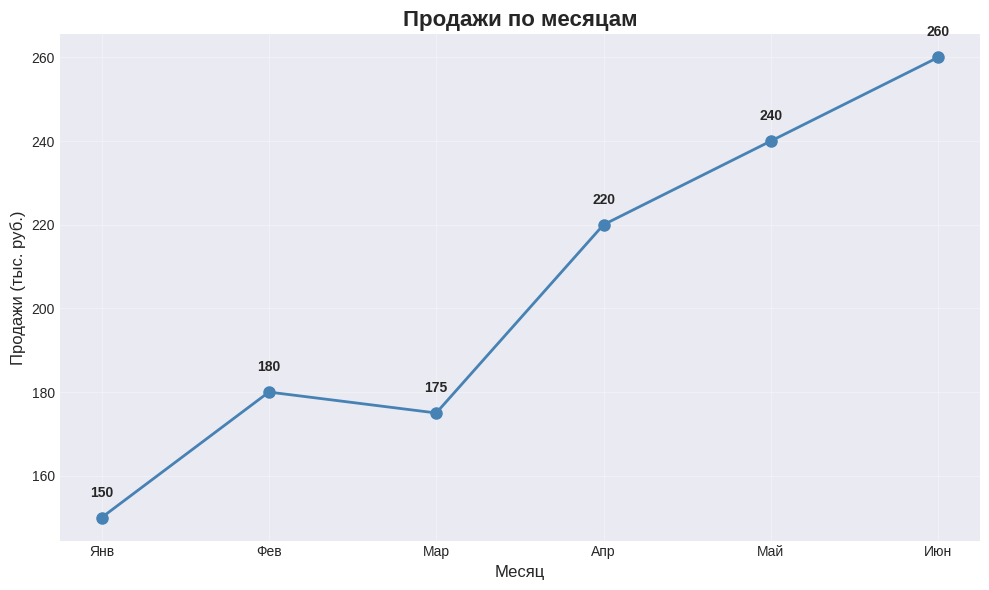

Минимальные продажи: 150 тыс. руб. в Янв
Максимальные продажи: 260 тыс. руб. в Июн
Прирост продаж: 110 тыс. руб. за период


In [3]:
# Создаем данные: продажи по месяцам
months = ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн']
sales = [150, 180, 175, 220, 240, 260]

# Создаем график
plt.figure(figsize=(10, 6))
plt.plot(months, sales, marker='o', linewidth=2, color='steelblue', markersize=8)

# Добавляем подписи
plt.title('Продажи по месяцам', fontsize=16, fontweight='bold')
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Продажи (тыс. руб.)', fontsize=12)
plt.grid(True, alpha=0.3)

# Показываем значения на каждой точке
for i, (month, sale) in enumerate(zip(months, sales)):
    plt.text(i, sale + 5, str(sale), ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Минимальные продажи: {min(sales)} тыс. руб. в {months[sales.index(min(sales))]}")
print(f"Максимальные продажи: {max(sales)} тыс. руб. в {months[sales.index(max(sales))]}")
print(f"Прирост продаж: {sales[-1] - sales[0]} тыс. руб. за период")

### Объяснение параметров:
- `marker='o'` — использует круги для обозначения точек
- `linewidth=2` — толщина линии
- `color='steelblue'` — цвет линии
- `markersize=8` — размер маркеров
- `figsize=(10, 6)` — размер фигуры в дюймах (ширина×высота)

### Пример 2: Несколько линий на одном графике

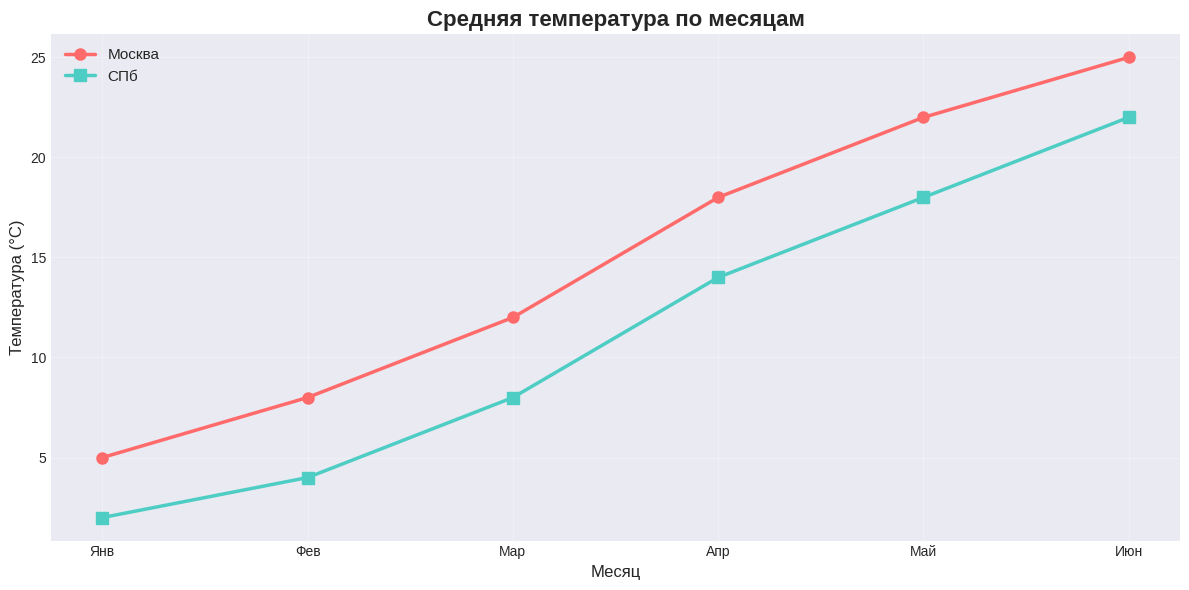

In [4]:
# Данные для двух городов
months = np.array([1, 2, 3, 4, 5, 6])
moscow_temp = [5, 8, 12, 18, 22, 25]
spb_temp = [2, 4, 8, 14, 18, 22]

plt.figure(figsize=(12, 6))

# График для Москвы
plt.plot(months, moscow_temp, marker='o', linewidth=2.5,
         color='#FF6B6B', label='Москва', markersize=8)

# График для СПб
plt.plot(months, spb_temp, marker='s', linewidth=2.5,
         color='#4ECDC4', label='СПб', markersize=8)

plt.title('Средняя температура по месяцам', fontsize=16, fontweight='bold')
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Температура (°C)', fontsize=12)
plt.xticks(months, ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн'])
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## ✏️ ЗАДАНИЕ 1.2

Создайте график изменения курса доллара по дням недели:
- Понедельник: 92.5
- Вторник: 93.1
- Среда: 92.8
- Четверг: 94.2
- Пятница: 95.0

**Требования:**
1. Добавьте два ряда: один для доллара, второй для евро (придумайте данные)
2. Используйте разные цвета и маркеры
3. Добавьте легенду
4. Выводы: напишите print() с минимальным/максимальным курсом

In [5]:
# ВАШ КОД ЗДЕСЬ


---
## 1.3 Столбчатые диаграммы (Bar plots)

### Когда использовать столбчатые диаграммы?
- **Сравнение категорий** (какой город больше, какой язык популярнее)
- **Рейтинги и топы** (ТОП-10 фильмов, лучшие страны)
- **Дискретные данные** (количество людей, количество товаров)

### Вертикальные vs горизонтальные столбцы:
- **Вертикальные**: когда категорий немного и названия короткие
- **Горизонтальные**: когда много категорий или длинные названия

### Пример 3: Вертикальная столбчатая диаграмма

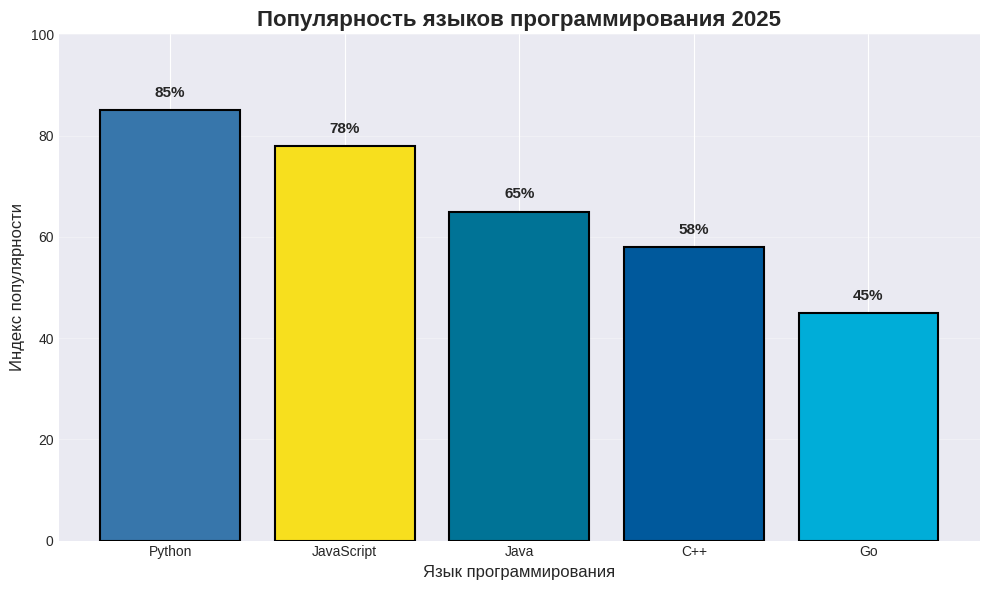

Самый популярный язык: Python (85%)
Разница между Python и Go: 40 пункта


In [6]:
# Данные: популярность языков программирования
languages = ['Python', 'JavaScript', 'Java', 'C++', 'Go']
popularity = [85, 78, 65, 58, 45]
colors = ['#3776ab', '#f7df1e', '#007396', '#00599c', '#00add8']

plt.figure(figsize=(10, 6))
bars = plt.bar(languages, popularity, color=colors, edgecolor='black', linewidth=1.5)

plt.title('Популярность языков программирования 2025', fontsize=16, fontweight='bold')
plt.xlabel('Язык программирования', fontsize=12)
plt.ylabel('Индекс популярности', fontsize=12)
plt.ylim(0, 100)

# Подписываем значения над столбцами
for bar, value in zip(bars, popularity):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2,
             f'{value}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Анализ
print(f"Самый популярный язык: {languages[popularity.index(max(popularity))]} ({max(popularity)}%)")
print(f"Разница между Python и Go: {popularity[0] - popularity[-1]} пункта")

### Пример 4: Горизонтальная столбчатая диаграмма (barh)

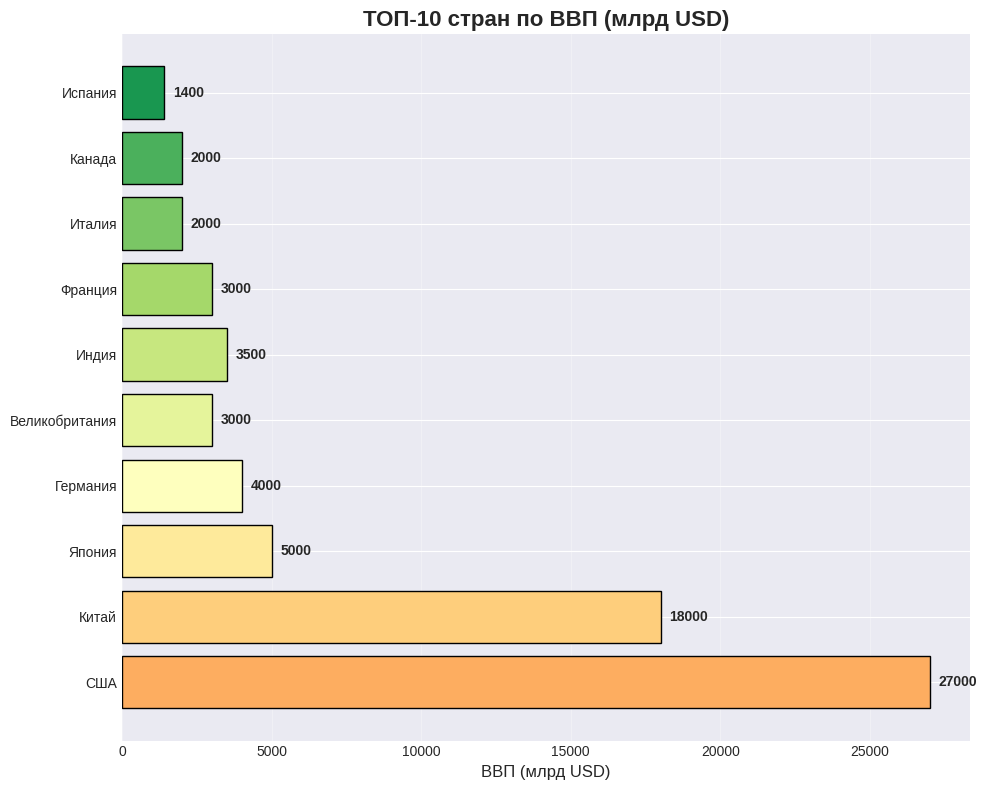

In [7]:
# Данные: ТОП-10 стран по ВВП (условные данные)
countries = ['США', 'Китай', 'Япония', 'Германия', 'Великобритания',
             'Индия', 'Франция', 'Италия', 'Канада', 'Испания']
gdp = [27000, 18000, 5000, 4000, 3000, 3500, 3000, 2000, 2000, 1400]

# Раскрашиваем в зависимости от значения
colors_grad = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(countries)))

plt.figure(figsize=(10, 8))
bars = plt.barh(countries, gdp, color=colors_grad, edgecolor='black', linewidth=1)

plt.title('ТОП-10 стран по ВВП (млрд USD)', fontsize=16, fontweight='bold')
plt.xlabel('ВВП (млрд USD)', fontsize=12)

# Подписываем значения
for bar, value in zip(bars, gdp):
    width = bar.get_width()
    plt.text(width + 300, bar.get_y() + bar.get_height()/2.,
             f'{value}', ha='left', va='center', fontsize=10, fontweight='bold')

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## ✏️ ЗАДАНИЕ 1.3

Создайте горизонтальную столбчатую диаграмму:

**Данные: ТОП-5 фильмов Кинопоиска (рейтинг)**
- Шоуншенк (IMDb: 9.3)
- Форрест Гамп (IMDb: 8.8)
- Побег (IMDb: 9.2)
- Матрица (IMDb: 8.7)
- Темный рыцарь (IMDb: 9.0)

**Требования:**
1. Раскрасьте столбцы в зависимости от рейтинга: ≥9.0 = зеленый, остальные = оранжевый
2. Добавьте значения рейтинга справа от каждого столбца
3. Найдите средний рейтинг

In [8]:
# ВАШ КОД ЗДЕСЬ


---
## 1.4 Гистограммы (Histograms)

### Когда использовать гистограммы?
- **Распределение непрерывных данных** (возраст, доход, время ответа)
- **Частота значений** (сколько людей в каком диапазоне возраста)
- **Понимание формы распределения** (нормальное, скошенное, мультимодальное)

### Важные параметры:
- **bins**: количество столбцов
  - Слишком мало = потеря деталей
  - Слишком много = шум и неровная линия
  - Правило: примерно √n, где n = количество значений
- **alpha**: прозрачность (0-1, где 1 = полностью непрозрачно)
- **edgecolor**: цвет границ столбцов

### Пример 5: Простая гистограмма

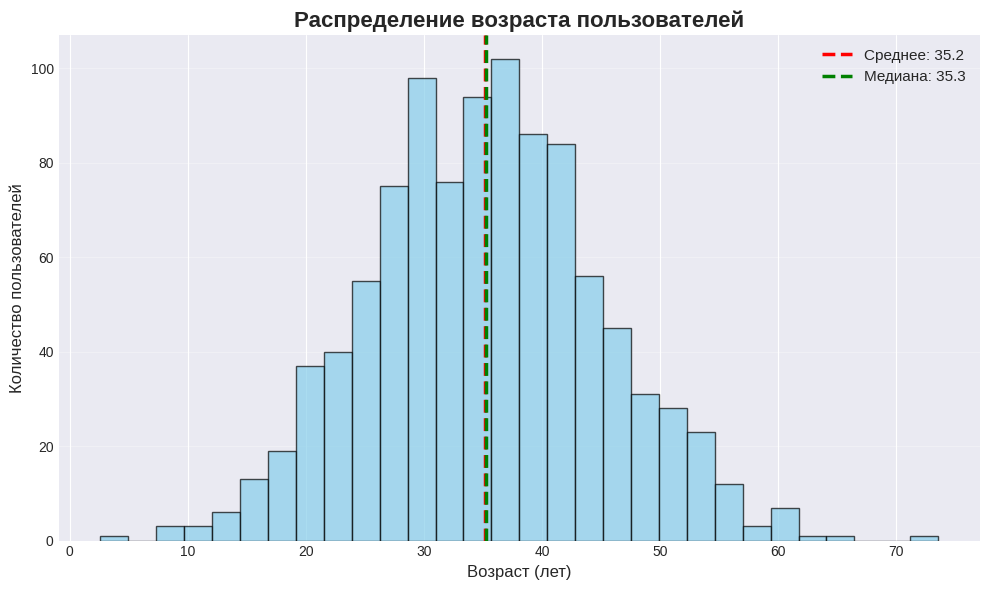

Среднее значение: 35.19
Медиана: 35.25
Стандартное отклонение: 9.79
Минимум: 2.59, Максимум: 73.53


In [9]:
# Генерируем случайные данные: возраст пользователей
np.random.seed(42)
ages = np.random.normal(35, 10, 1000)  # среднее=35, стандартное отклонение=10

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(ages, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Распределение возраста пользователей', fontsize=16, fontweight='bold')
plt.xlabel('Возраст (лет)', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)

# Добавляем статистические линии
mean_age = np.mean(ages)
median_age = np.median(ages)

plt.axvline(mean_age, color='red', linestyle='--', linewidth=2.5, label=f'Среднее: {mean_age:.1f}')
plt.axvline(median_age, color='green', linestyle='--', linewidth=2.5, label=f'Медиана: {median_age:.1f}')

plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Статистика
print(f"Среднее значение: {mean_age:.2f}")
print(f"Медиана: {median_age:.2f}")
print(f"Стандартное отклонение: {np.std(ages):.2f}")
print(f"Минимум: {np.min(ages):.2f}, Максимум: {np.max(ages):.2f}")

### Пример 6: Сравнение распределений (несколько гистограмм)

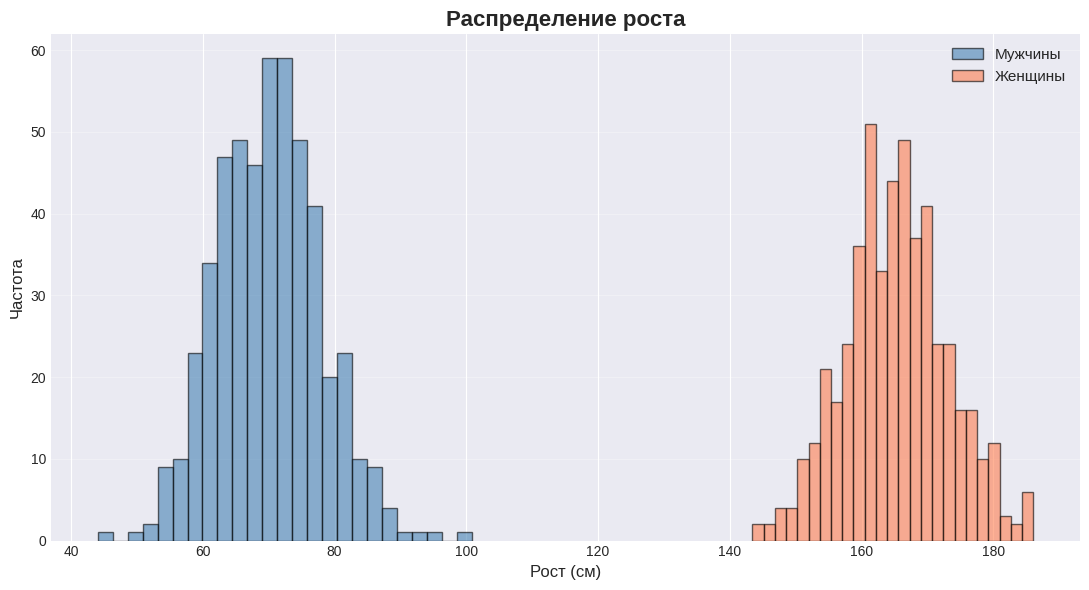

Средний рост мужчин: 70.1 см
Средний рост женщин: 165.3 см


In [10]:
# Генерируем данные для двух групп
np.random.seed(42)
group1 = np.random.normal(70, 8, 500)   # средний рост мужчин
group2 = np.random.normal(165, 8, 500)  # средний рост женщин

plt.figure(figsize=(11, 6))

plt.hist(group1, bins=25, alpha=0.6, color='steelblue', label='Мужчины', edgecolor='black')
plt.hist(group2, bins=25, alpha=0.6, color='coral', label='Женщины', edgecolor='black')

plt.title('Распределение роста', fontsize=16, fontweight='bold')
plt.xlabel('Рост (см)', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Средний рост мужчин: {np.mean(group1):.1f} см")
print(f"Средний рост женщин: {np.mean(group2):.1f} см")

## ✏️ ЗАДАНИЕ 1.4

Создайте гистограмму для оценок студентов (от 0 до 100):

**Требования:**
1. Сгенерируйте 500 оценок с нормальным распределением (среднее=72, отклонение=15)
2. Постройте гистограмму с разным количеством bins (10, 20, 50) в трех подграфиках
3. Добавьте вертикальные линии для среднего и медианы
4. Выведите статистику: среднее, медиана, минимум, максимум

In [11]:
# ВАШ КОД ЗДЕСЬ


---
## 1.5 Диаграммы рассеяния (Scatter plots)

### Когда использовать диаграммы рассеяния?
- **Связь между двумя переменными** (зависит ли Y от X?)
- **Поиск корреляций** (если X растет, Y тоже растет?)
- **Выявление выбросов** (точки, которые сильно отличаются)

### Как интерпретировать облако точек:
- **Облако вверх-вправо** → положительная корреляция
- **Облако вниз-вправо** → отрицательная корреляция
- **Хаотичное облако** → нет корреляции
- **Изолированные точки** → выбросы

### Пример 7: Простая диаграмма рассеяния

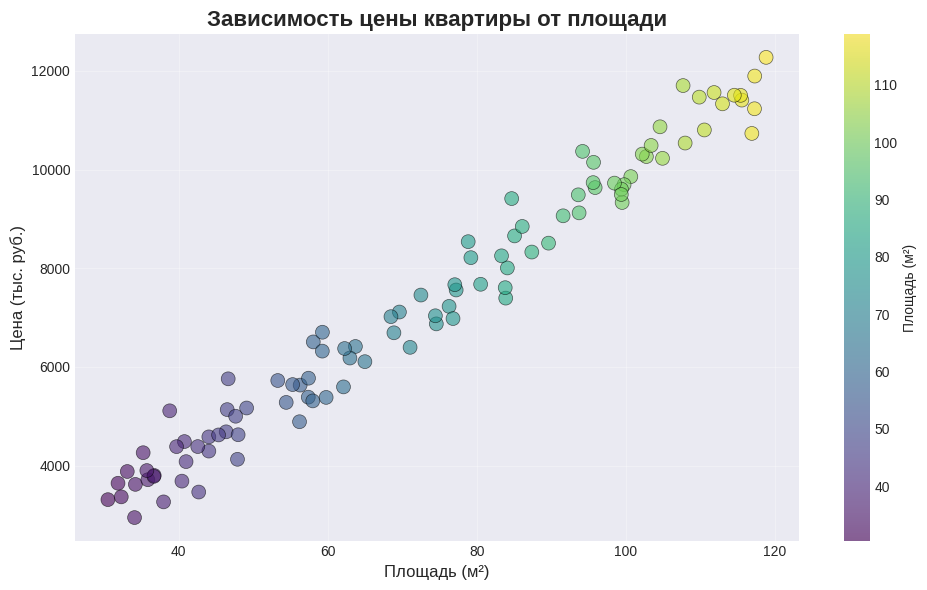

Корреляция между площадью и ценой: 0.985
Интерпретация: Сильная положительная связь


In [12]:
# Данные: площадь квартиры vs цена
np.random.seed(42)
area = np.random.uniform(30, 120, 100)
price = area * 100 + np.random.normal(0, 500, 100)  # цена ~ 100*площадь + шум

plt.figure(figsize=(10, 6))
plt.scatter(area, price, alpha=0.6, s=100, c=area, cmap='viridis', edgecolors='black', linewidth=0.5)

plt.title('Зависимость цены квартиры от площади', fontsize=16, fontweight='bold')
plt.xlabel('Площадь (м²)', fontsize=12)
plt.ylabel('Цена (тыс. руб.)', fontsize=12)

cbar = plt.colorbar(label='Площадь (м²)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Вычисляем корреляцию
correlation = np.corrcoef(area, price)[0, 1]
print(f"Корреляция между площадью и ценой: {correlation:.3f}")
print(f"Интерпретация: {'Сильная положительная связь' if correlation > 0.7 else 'Умеренная связь'}")

### Пример 8: Scatter plot с линией тренда

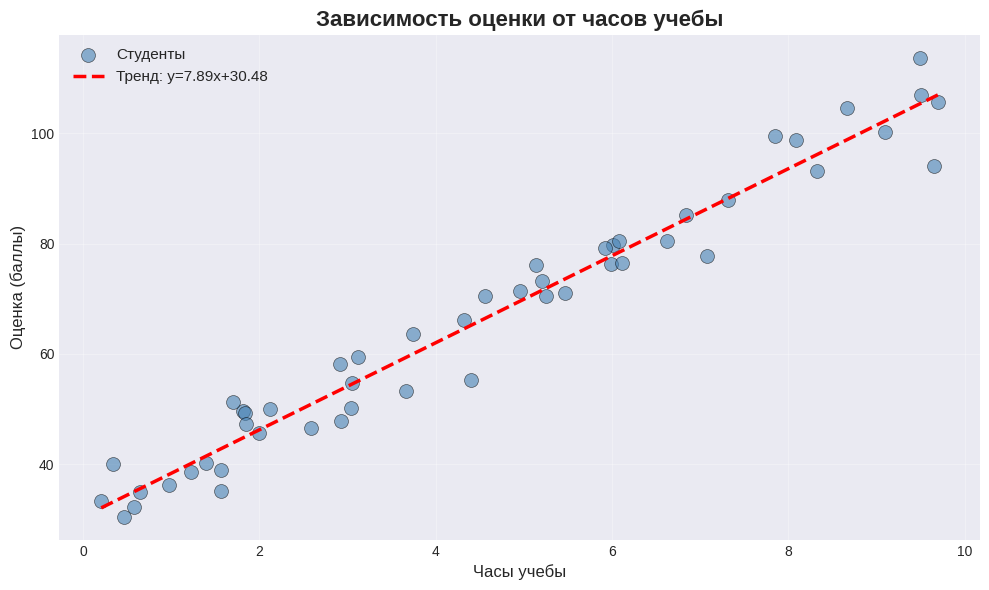

Уравнение тренда: оценка = 7.89 * часы + 30.48
Каждый дополнительный час учебы добавляет ~7.89 баллов


In [13]:
# Создаем данные: часы учебы vs оценка на экзамене
np.random.seed(42)
study_hours = np.random.uniform(0, 10, 50)
exam_score = study_hours * 8 + np.random.normal(30, 5, 50)

# Вычисляем линию тренда
z = np.polyfit(study_hours, exam_score, 1)  # линейное приближение
p = np.poly1d(z)
x_trend = np.linspace(study_hours.min(), study_hours.max(), 100)
y_trend = p(x_trend)

plt.figure(figsize=(10, 6))
plt.scatter(study_hours, exam_score, alpha=0.6, s=100, c='steelblue',
            edgecolors='black', linewidth=0.5, label='Студенты')
plt.plot(x_trend, y_trend, 'r--', linewidth=2.5, label=f'Тренд: y={z[0]:.2f}x+{z[1]:.2f}')

plt.title('Зависимость оценки от часов учебы', fontsize=16, fontweight='bold')
plt.xlabel('Часы учебы', fontsize=12)
plt.ylabel('Оценка (баллы)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Уравнение тренда: оценка = {z[0]:.2f} * часы + {z[1]:.2f}")
print(f"Каждый дополнительный час учебы добавляет ~{z[0]:.2f} баллов")

## ✏️ ЗАДАНИЕ 1.5

Создайте scatter plot с линией тренда:

**Требования:**
1. Используйте данные: часы в интернете (X) vs оценки в школе (Y)
   - Сгенерируйте 100 точек
   - Логика: больше интернета = ниже оценки
2. Измените размер точек в зависимости от третьего параметра (например, возраст)
3. Добавьте линию тренда
4. Вычислите и выведите корреляцию

In [14]:
# ВАШ КОД ЗДЕСЬ


---
## 1.6 Подграфики (Subplots)

### Зачем нужны подграфики?
- **Сравнение нескольких графиков** рядом
- **Компактное представление** информации
- **Разные аспекты одних данных** в одной фигуре

### Пример 9: Сетка подграфиков (2x2)

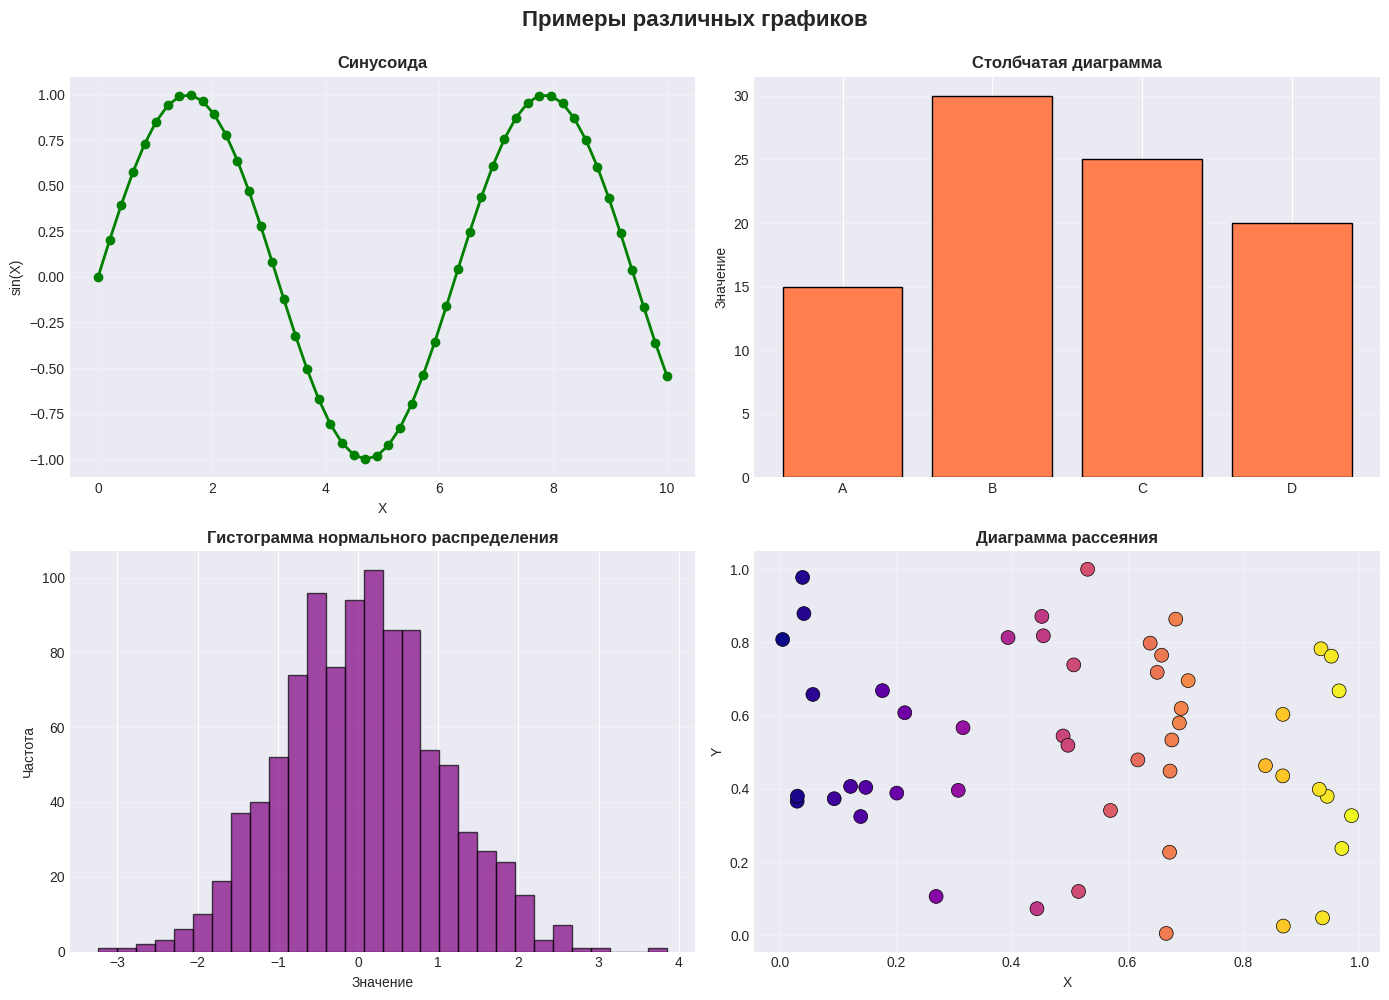

In [15]:
# Создаем фигуру с 2х2 подграфиками
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# График 1: Линейный график
x = np.linspace(0, 10, 50)
axes[0, 0].plot(x, np.sin(x), 'g-o', linewidth=2)
axes[0, 0].set_title('Синусоида', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('X')
axes[0, 0].set_ylabel('sin(X)')
axes[0, 0].grid(True, alpha=0.3)

# График 2: Столбчатая диаграмма
categories = ['A', 'B', 'C', 'D']
values = [15, 30, 25, 20]
axes[0, 1].bar(categories, values, color='coral', edgecolor='black')
axes[0, 1].set_title('Столбчатая диаграмма', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Значение')
axes[0, 1].grid(axis='y', alpha=0.3)

# График 3: Гистограмма
data = np.random.randn(1000)
axes[1, 0].hist(data, bins=30, color='purple', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Гистограмма нормального распределения', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Значение')
axes[1, 0].set_ylabel('Частота')
axes[1, 0].grid(axis='y', alpha=0.3)

# График 4: Диаграмма рассеяния
x_scatter = np.random.rand(50)
y_scatter = np.random.rand(50)
axes[1, 1].scatter(x_scatter, y_scatter, c=x_scatter, cmap='plasma', s=100, edgecolor='black', linewidth=0.5)
axes[1, 1].set_title('Диаграмма рассеяния', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('X')
axes[1, 1].set_ylabel('Y')
axes[1, 1].grid(True, alpha=0.3)

# Общий заголовок
fig.suptitle('Примеры различных графиков', fontsize=16, fontweight='bold', y=0.995)

plt.tight_layout()
plt.show()

## ✏️ ЗАДАНИЕ 1.6

Создайте дашборд (2×2 subplot) для анализа данных о продажах:

**Требования:**
1. **График 1** (верхний левый): Линейный график продаж по месяцам
2. **График 2** (верхний правый): Bar plot продаж по категориям товаров
3. **График 3** (нижний левый): Histogram распределения сумм чеков
4. **График 4** (нижний правый): Scatter plot количество товаров vs сумма чека

**Совет:** Сгенерируйте или придумайте данные для каждого графика

In [16]:
# ВАШ КОД ЗДЕСЬ


---
# 🎯 ЧАСТЬ 2: SEABORN И ИНТЕРАКТИВНОСТЬ
---

## 2.1 Введение в Seaborn

### Почему Seaborn?
- **Красивые графики "из коробки"** — не нужно настраивать каждый параметр
- **Встроенная работа с pandas DataFrame** — напрямую передаете таблицы
- **Статистические визуализации** — автоматические вычисления доверительных интервалов
- **Удобные цветовые палитры** — красиво раскрашивает по умолчанию
- **Легче обработка "больших данных"** — работает с категориальными переменными

### Загрузка встроенных данных

In [17]:
# Загружаем датасет о чаевых
tips = sns.load_dataset('tips')

print("Первые 10 строк:")
print(tips.head(10))

print("\nИнформация о датасете:")
print(f"Размер: {tips.shape}")
print(f"Колонки: {tips.columns.tolist()}")
print(f"\nОписательная статистика:")
print(tips.describe())

Первые 10 строк:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2

Информация о датасете:
Размер: (244, 7)
Колонки: ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

Описательная статистика:
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000

## 2.2 Box plots и Violin plots

### Что показывает Box plot?
```
      Максимум (или Q3 + 1.5*IQR)
           |
    +------+------+
    |  75% |  |   |  Верхняя четверть (Q3)
    |  50% |--|   |  Медиана
    |  25% |  |   |  Нижняя четверть (Q1)
    +------+------+
           |
      Минимум (или Q1 - 1.5*IQR)
      
o, o         — выбросы
```

### Violin plot = Box plot + распределение
- Показывает не только квартили, но и полное распределение
- Ширина = плотность значений

### Пример 10: Box plot

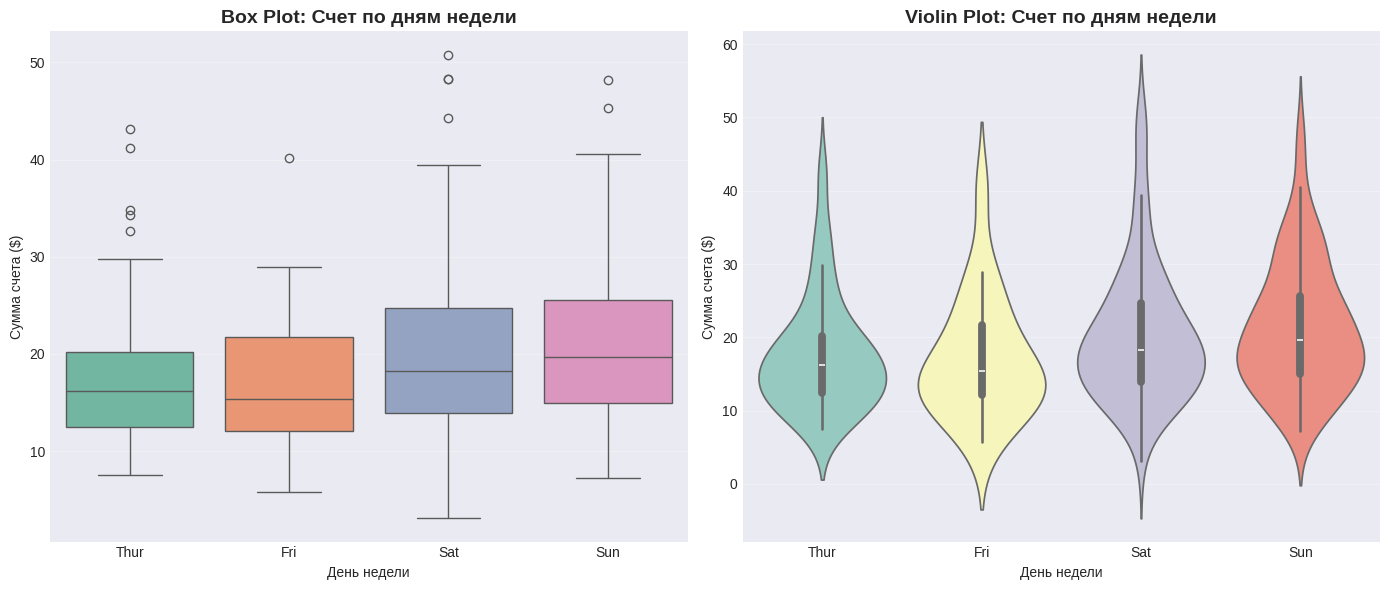

Статистика по дням:
      count       mean       std   min      25%    50%      75%    max
day                                                                   
Thur   62.0  17.682742  7.886170  7.51  12.4425  16.20  20.1550  43.11
Fri    19.0  17.151579  8.302660  5.75  12.0950  15.38  21.7500  40.17
Sat    87.0  20.441379  9.480419  3.07  13.9050  18.24  24.7400  50.81
Sun    76.0  21.410000  8.832122  7.25  14.9875  19.63  25.5975  48.17


In [18]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box plot: Счет по дням недели
sns.boxplot(data=tips, x='day', y='total_bill', ax=axes[0], palette='Set2')
axes[0].set_title('Box Plot: Счет по дням недели', fontsize=14, fontweight='bold')
axes[0].set_xlabel('День недели')
axes[0].set_ylabel('Сумма счета ($)')
axes[0].grid(axis='y', alpha=0.3)

# Violin plot: Счет по дням недели
sns.violinplot(data=tips, x='day', y='total_bill', ax=axes[1], palette='Set3')
axes[1].set_title('Violin Plot: Счет по дням недели', fontsize=14, fontweight='bold')
axes[1].set_xlabel('День недели')
axes[1].set_ylabel('Сумма счета ($)')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Анализ
print("Статистика по дням:")
print(tips.groupby('day')['total_bill'].describe())

### Пример 11: Box plot с hue (разделение по категориям)

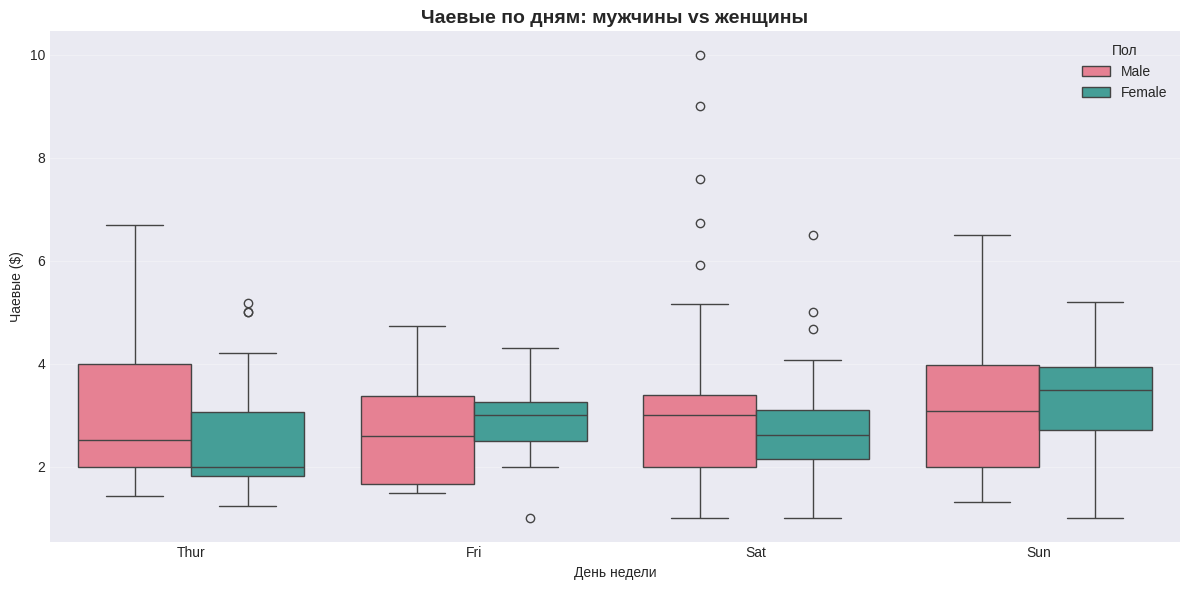

Средние чаевые:
day   sex   
Thur  Male      2.980333
      Female    2.575625
Fri   Male      2.693000
      Female    2.781111
Sat   Male      3.083898
      Female    2.801786
Sun   Male      3.220345
      Female    3.367222
Name: tip, dtype: float64


In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=tips, x='day', y='tip', hue='sex', palette='husl')
plt.title('Чаевые по дням: мужчины vs женщины', fontsize=14, fontweight='bold')
plt.xlabel('День недели')
plt.ylabel('Чаевые ($)')
plt.legend(title='Пол', loc='upper right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Анализ
print("Средние чаевые:")
print(tips.groupby(['day', 'sex'])['tip'].mean())

## ✏️ ЗАДАНИЕ 2.2

Используя датасет `tips`:

**Требования:**
1. Создайте box plot для сравнения чаевых (tip) между мужчинами и женщинами
2. Добавьте hue для разделения по времени дня (lunch/dinner)
3. Сделайте второй графика: violin plot с тем же разбиением
4. Выведите среднее значение чаевых для каждой группы

In [20]:
# ВАШ КОД ЗДЕСЬ


---
## 2.3 Тепловые карты (Heatmaps)

### Когда использовать тепловые карты?
- **Корреляции между переменными** (какие переменные связаны?)
- **Таблицы сопряженности** (сколько мужчин/женщин каждого возраста?)
- **Матрицы расстояний** (дистанции между объектами)

### Цветовая схема:
- **Светлые цвета** = низкие значения
- **Темные цвета** = высокие значения
- **Параметр `center`** = значение, при котором меняется цвет (часто используется для корреляций)

### Пример 12: Матрица корреляций

Матрица корреляций:
            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


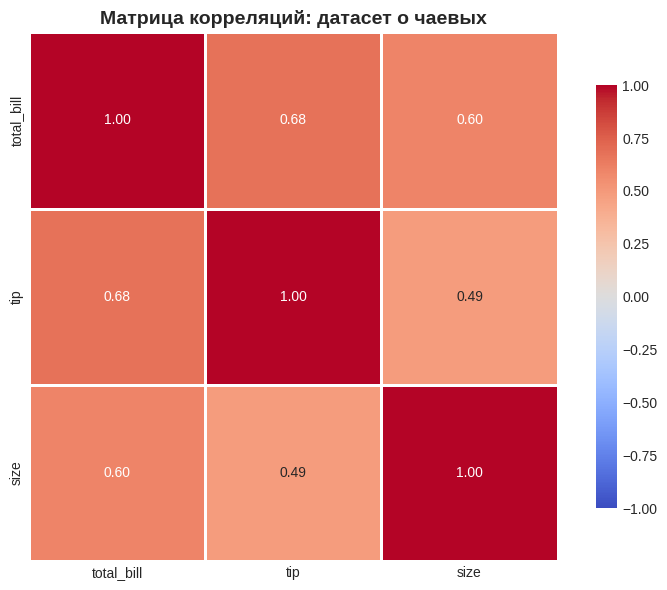

In [21]:
# Вычисляем матрицу корреляций
correlation = tips.corr(numeric_only=True)
print("Матрица корреляций:")
print(correlation)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            fmt='.2f', vmin=-1, vmax=1)
plt.title('Матрица корреляций: датасет о чаевых', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Пример 13: Тепловая карта для Pivot Table

Pivot Table (среднее значение счета):
time      Lunch     Dinner
day                       
Thur  17.664754  18.780000
Fri   12.845714  19.663333
Sat         NaN  20.441379
Sun         NaN  21.410000


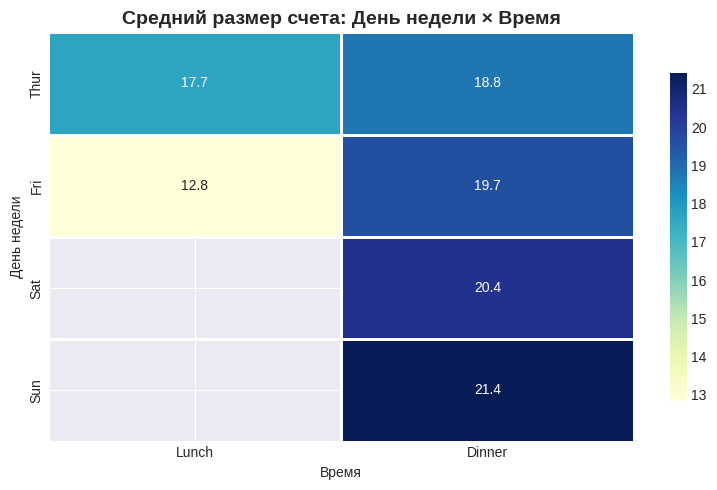

In [22]:
# Создаем pivot table: средний счет по дням и времени
pivot_table = tips.pivot_table(values='total_bill', index='day', columns='time', aggfunc='mean')
print("Pivot Table (среднее значение счета):")
print(pivot_table)

plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', linewidths=1,
            cbar_kws={"shrink": 0.8}, fmt='.1f')
plt.title('Средний размер счета: День недели × Время', fontsize=14, fontweight='bold')
plt.ylabel('День недели')
plt.xlabel('Время')
plt.tight_layout()
plt.show()

## ✏️ ЗАДАНИЕ 2.3

**Требования:**
1. Создайте pivot table: среднее значение чаевых (tip) по дням (day) и поло (sex)
2. Постройте heatmap для этой таблицы
3. Измените цветовую палитру на 'RdYlGn'
4. Добавьте значения в ячейки с 1 знаком после запятой

In [23]:
# ВАШ КОД ЗДЕСЬ


---
## 2.4 Pair plots

### Что такое Pair plot?
- **Все переменные против всех** — полный обзор взаимосвязей
- **Диагональ** = распределение каждой переменной (гистограмма или KDE)
- **Остальные ячейки** = scatter plots между переменными
- **Быстрый способ** исследовать новые данные (EDA)

### Параметры:
- `hue='column'` — раскрашивает по категориальной переменной
- `diag_kind='kde'` — использует плотность вместо гистограммы
- `height` — размер каждого подграфика

### Пример 14: Pair plot

Датасет Iris:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


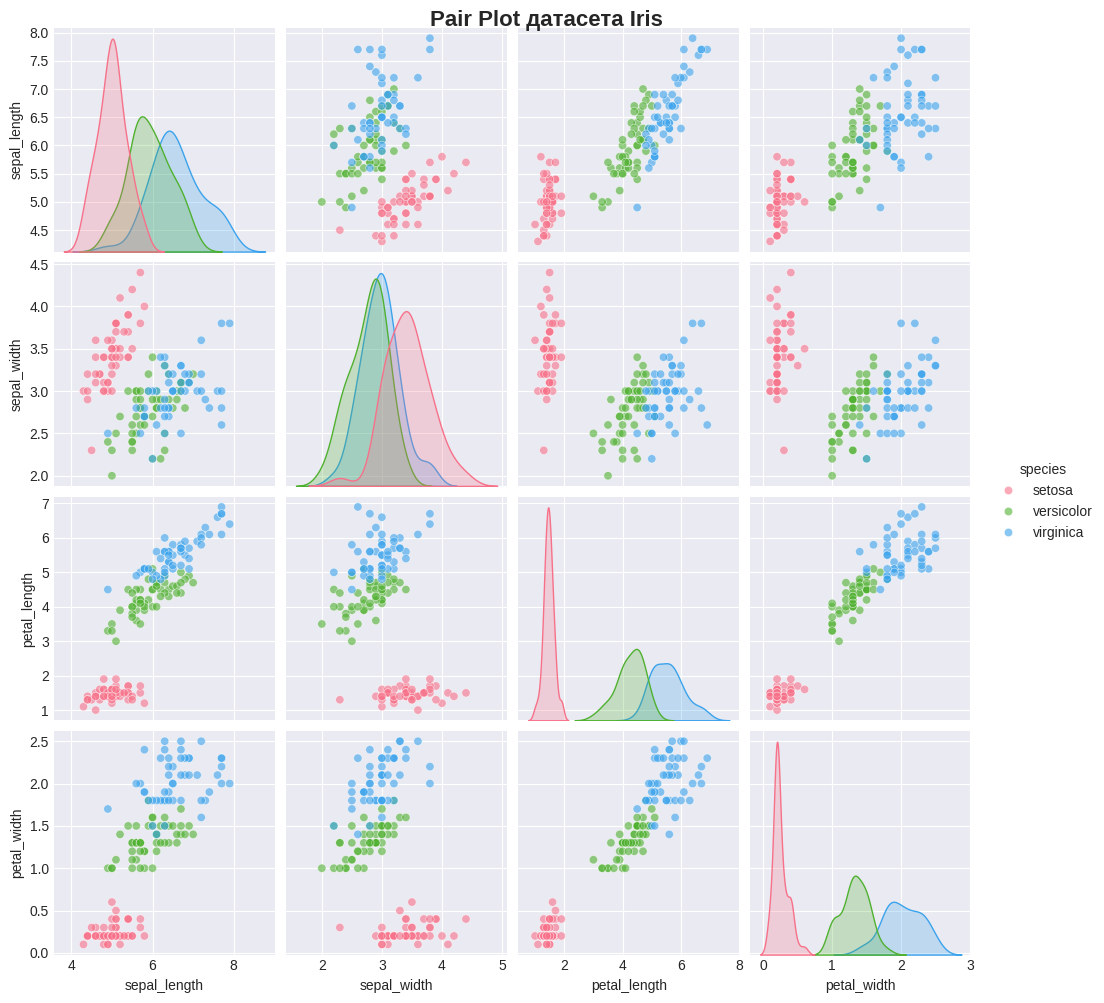

In [24]:
# Загружаем датасет Iris
iris = sns.load_dataset('iris')
print("Датасет Iris:")
print(iris.head())

# Создаем pair plot
g = sns.pairplot(iris, hue='species', palette='husl', diag_kind='kde',
                  plot_kws={'alpha': 0.6}, height=2.5)
g.fig.suptitle('Pair Plot датасета Iris', fontsize=16, fontweight='bold', y=1.00)
plt.show()

### Пример 15: Joint plot (для одной пары переменных)

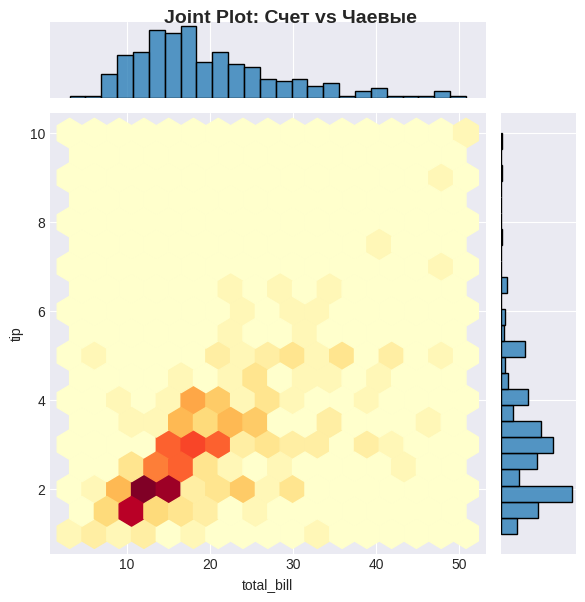


Корреляция между счетом и чаевыми: 0.676


In [25]:
# Детальный анализ двух переменных
g = sns.jointplot(data=tips, x='total_bill', y='tip', kind='hex', height=6,
                  marginal_kws=dict(bins=25, fill=True), cmap='YlOrRd')
g.fig.suptitle('Joint Plot: Счет vs Чаевые', fontsize=14, fontweight='bold', y=0.995)
plt.show()

# Корреляция
corr = tips['total_bill'].corr(tips['tip'])
print(f"\nКорреляция между счетом и чаевыми: {corr:.3f}")

## ✏️ ЗАДАНИЕ 2.4

Загрузите датасет Iris и создайте:

**Требования:**
1. Pair plot с разделением по видам (species)
2. Используйте разные палитры цветов
3. Выведите максимальное и минимальное значения для каждого признака

In [26]:
# ВАШ КОД ЗДЕСЬ


---
## 2.5 Count plots и Cat plots

### Для категориальных данных

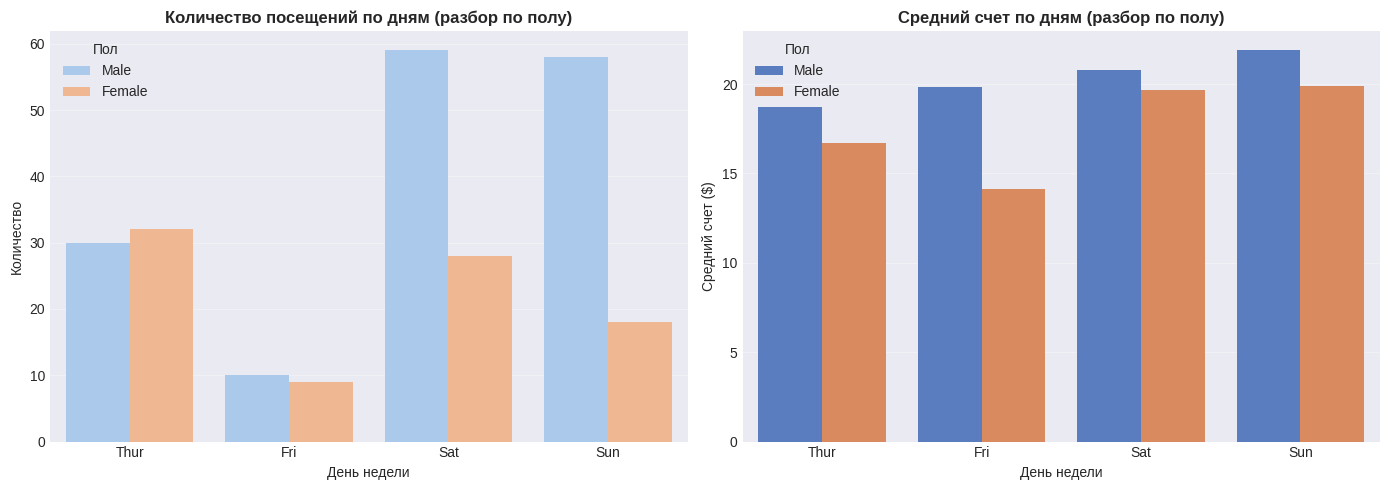

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot: Количество посещений по дням
sns.countplot(data=tips, x='day', hue='sex', palette='pastel', ax=axes[0])
axes[0].set_title('Количество посещений по дням (разбор по полу)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('День недели')
axes[0].set_ylabel('Количество')
axes[0].legend(title='Пол')
axes[0].grid(axis='y', alpha=0.3)

# Cat plot в виде bar
tips_grouped = tips.groupby(['day', 'sex'])['total_bill'].mean().reset_index()
sns.barplot(data=tips_grouped, x='day', y='total_bill', hue='sex', palette='muted', ax=axes[1])
axes[1].set_title('Средний счет по дням (разбор по полу)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('День недели')
axes[1].set_ylabel('Средний счет ($)')
axes[1].legend(title='Пол')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## ✏️ ЗАДАНИЕ 2.5

Используя датасет `tips`:

**Требования:**
1. Создайте count plot для распределения курящих/некурящих (smoker) по времени дня (time)
2. Добавьте разделение по полу (hue='sex')
3. Выведите количество наблюдений в каждой группе

In [28]:
# ВАШ КОД ЗДЕСЬ


---
## 2.6 Регрессионные графики

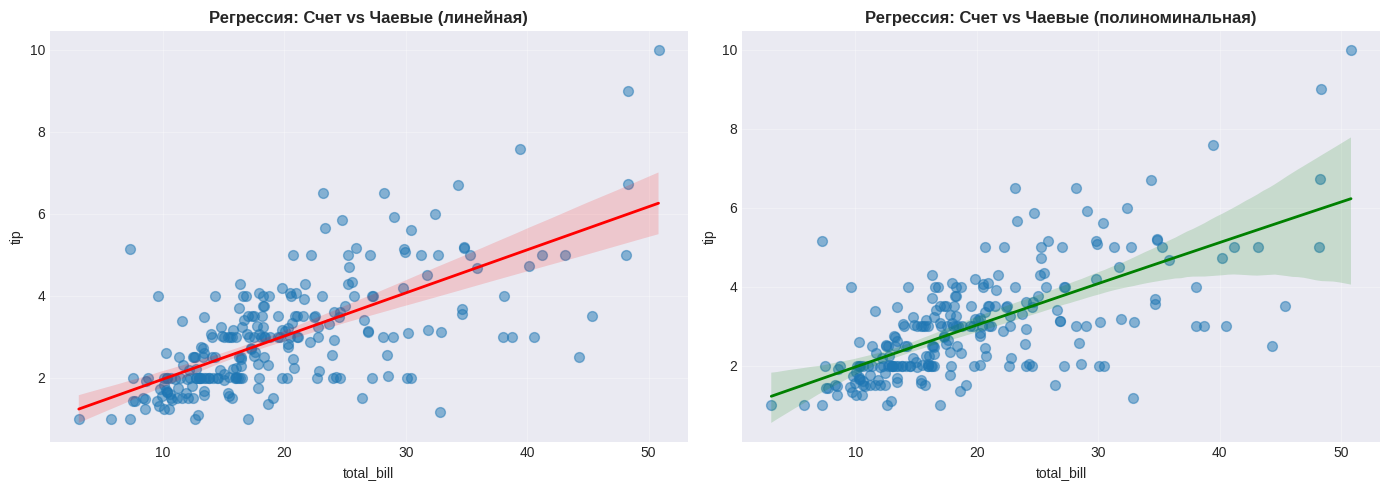

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Regplot с линейной регрессией
sns.regplot(data=tips, x='total_bill', y='tip', ax=axes[0],
            scatter_kws={'alpha': 0.5, 's': 50},
            line_kws={'color': 'red', 'linewidth': 2})
axes[0].set_title('Регрессия: Счет vs Чаевые (линейная)', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Lmplot с разделением по категориям
sns.regplot(data=tips, x='total_bill', y='tip', ax=axes[1],
            scatter_kws={'alpha': 0.5, 's': 50},
            line_kws={'color': 'green', 'linewidth': 2},
            order=2)  # полиномиальная регрессия 2-го порядка
axes[1].set_title('Регрессия: Счет vs Чаевые (полиноминальная)', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
## 2.7 Интерактивные графики с Plotly

### Преимущества Plotly:
- **Интерактивность**: zoom, pan, hover
- **HTML экспорт**: легко делиться графиками
- **Подходит для дашбордов**: быстро создавать интерфейсы
- **Красивые анимации**: динамические визуализации

In [30]:
# Установка, если еще не установлена
# !pip install plotly

In [31]:
import plotly.express as px

# Интерактивный scatter plot
fig = px.scatter(tips, x='total_bill', y='tip', color='time', size='size',
                 hover_data=['day', 'sex'],
                 title='Интерактивный график: Счет vs Чаевые',
                 labels={'total_bill': 'Сумма счета ($)', 'tip': 'Чаевые ($)', 'size': 'Размер группы'})
fig.update_traces(marker=dict(line=dict(width=1, color='white')))
fig.show()

### Пример 16: Интерактивный линейный график

In [32]:
# Создаем временные данные
dates = pd.date_range('2024-01-01', periods=100)
np.random.seed(42)
values = np.cumsum(np.random.randn(100)) + 50

df_time = pd.DataFrame({
    'Дата': dates,
    'Значение': values
})

fig = px.line(df_time, x='Дата', y='Значение',
              title='Интерактивный временной ряд',
              labels={'Значение': 'Показатель'})
fig.update_traces(line_color='steelblue', line_width=2)
fig.show()

### Пример 17: Интерактивный bar chart

In [33]:
# Подготавливаем данные
avg_tip_by_day = tips.groupby('day')['tip'].mean().reset_index()
avg_tip_by_day = avg_tip_by_day.sort_values('tip', ascending=False)

fig = px.bar(avg_tip_by_day, x='day', y='tip',
             title='Средние чаевые по дням недели',
             labels={'day': 'День', 'tip': 'Средние чаевые ($)'},
             color='tip',
             color_continuous_scale='Viridis')
fig.update_layout(showlegend=False)
fig.show()

### Пример 18: Интерактивный box plot

In [34]:
fig = px.box(tips, x='day', y='total_bill', color='sex',
            title='Box Plot: Счет по дням и полу',
            labels={'day': 'День', 'total_bill': 'Сумма счета ($)', 'sex': 'Пол'})
fig.show()

## ✏️ ЗАДАНИЕ 2.7

**Требования:**
1. Создайте интерактивный scatter plot для датасета tips (счет vs чаевые)
2. Раскрасьте точки по времени (lunch/dinner)
3. Создайте интерактивный bar chart: среднее значение счета по дням
4. Создайте интерактивный box plot: распределение чаевых по полу

In [35]:
# ВАШ КОД ЗДЕСЬ


---
## 2.8 Интерактивные виджеты с ipywidgets

In [36]:
# Установка, если еще не установлена
# !pip install ipywidgets

from ipywidgets import interact, IntSlider, FloatSlider, Dropdown
import plotly.graph_objects as go

### Пример 19: Интерактивные слайдеры

In [37]:
def plot_sine(frequency, amplitude):
    x = np.linspace(0, 10, 500)
    y = amplitude * np.sin(frequency * x)

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines',
                            line=dict(color='steelblue', width=2)))
    fig.update_layout(
        title=f'Синусоида: freq={frequency}, amp={amplitude}',
        xaxis_title='X',
        yaxis_title='sin(X)',
        height=500
    )
    fig.show()

# Создаем интерактивные слайдеры
interact(plot_sine,
         frequency=IntSlider(min=1, max=5, step=1, value=2, description='Частота'),
         amplitude=IntSlider(min=1, max=5, step=1, value=1, description='Амплитуда'))

interactive(children=(IntSlider(value=2, description='Частота', max=5, min=1), IntSlider(value=1, description=…

<function __main__.plot_sine(frequency, amplitude)>

### Пример 20: Комплексный виджет с несколькими параметрами

In [38]:
def plot_data(graph_type, num_points, noise_level):
    x = np.linspace(0, 10, num_points)
    y = np.sin(x) + np.random.normal(0, noise_level, num_points)

    fig = go.Figure()

    if graph_type == 'line':
        fig.add_trace(go.Scatter(x=x, y=y, mode='lines',
                                line=dict(color='steelblue', width=2)))
    elif graph_type == 'scatter':
        fig.add_trace(go.Scatter(x=x, y=y, mode='markers',
                                marker=dict(size=8, color='coral')))
    else:  # both
        fig.add_trace(go.Scatter(x=x, y=y, mode='lines+markers',
                                line=dict(color='steelblue', width=1),
                                marker=dict(size=6, color='coral')))

    fig.update_layout(
        title=f'График: {graph_type.upper()} (шум={noise_level:.2f})',
        xaxis_title='X',
        yaxis_title='Y',
        height=500
    )
    fig.show()

# Создаем виджеты
interact(plot_data,
         graph_type=Dropdown(options=['line', 'scatter', 'both'], value='line',
                             description='Тип графика'),
         num_points=IntSlider(min=10, max=200, step=10, value=50,
                             description='Количество точек'),
         noise_level=FloatSlider(min=0, max=1, step=0.1, value=0.2,
                                description='Уровень шума'))

interactive(children=(Dropdown(description='Тип графика', options=('line', 'scatter', 'both'), value='line'), …

<function __main__.plot_data(graph_type, num_points, noise_level)>

## ✏️ ЗАДАНИЕ 2.8

Создайте интерактивный график с виджетами:

**Требования:**
1. Используйте датасет tips
2. Создайте виджет для выбора типа графика (scatter, line, bar)
3. Добавьте слайдер для выбора переменной
4. График должен обновляться при изменении параметров

In [39]:
# ВАШ КОД ЗДЕСЬ


---
## 2.9 Продвинутые настройки стиля

### Стили Seaborn

In [40]:
# Доступные стили
print("Доступные стили:")
print(sns.axes_style().keys())

# Контексты
print("\nДоступные контексты:")
print("paper, notebook, talk, poster")

Доступные стили:
dict_keys(['axes.facecolor', 'axes.edgecolor', 'axes.grid', 'axes.axisbelow', 'axes.labelcolor', 'figure.facecolor', 'grid.color', 'grid.linestyle', 'text.color', 'xtick.color', 'ytick.color', 'xtick.direction', 'ytick.direction', 'lines.solid_capstyle', 'patch.edgecolor', 'patch.force_edgecolor', 'image.cmap', 'font.family', 'font.sans-serif', 'xtick.bottom', 'xtick.top', 'ytick.left', 'ytick.right', 'axes.spines.left', 'axes.spines.bottom', 'axes.spines.right', 'axes.spines.top'])

Доступные контексты:
paper, notebook, talk, poster


### Пример 21: Кастомный стиль

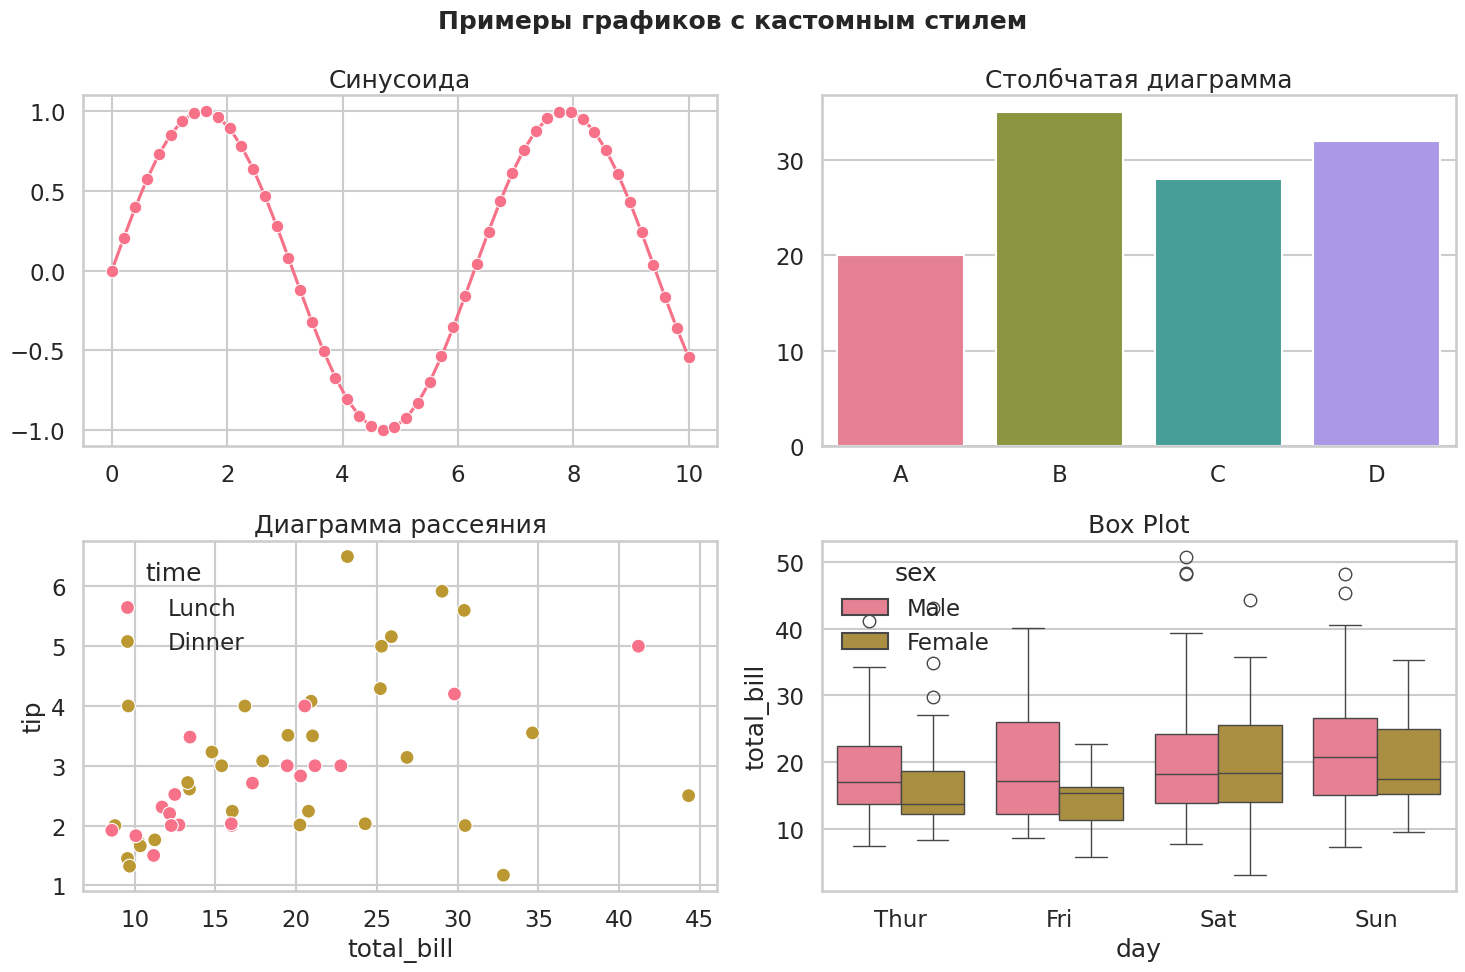

In [41]:
# Применяем кастомный стиль
sns.set_style("whitegrid")
sns.set_context("talk")  # paper, notebook, talk, poster
sns.set_palette("husl")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Примеры графиков с кастомным стилем', fontsize=18, fontweight='bold')

# График 1: Линейный
data_x = np.linspace(0, 10, 50)
sns.lineplot(x=data_x, y=np.sin(data_x), marker='o', ax=axes[0, 0])
axes[0, 0].set_title('Синусоида')

# График 2: Столбчатый
sns.barplot(x=['A', 'B', 'C', 'D'], y=[20, 35, 28, 32], ax=axes[0, 1], palette='husl')
axes[0, 1].set_title('Столбчатая диаграмма')

# График 3: Scatter
tips_sample = tips.sample(50)
sns.scatterplot(data=tips_sample, x='total_bill', y='tip', hue='time', ax=axes[1, 0], s=100)
axes[1, 0].set_title('Диаграмма рассеяния')

# График 4: Box plot
sns.boxplot(data=tips, x='day', y='total_bill', hue='sex', ax=axes[1, 1])
axes[1, 1].set_title('Box Plot')

plt.tight_layout()
plt.show()

---
# 🎯 ФИНАЛЬНОЕ КОМПЛЕКСНОЕ ЗАДАНИЕ

## 📋 Описание задания

Вам нужно провести комплексный анализ датасета (40-50 минут):

### **Часть 1: Разведочный анализ (EDA)**
1. Загрузите датасет (используйте `tips` или создайте свой)
2. Выведите основную информацию (shape, describe, info)
3. Создайте 4 разных графика matplotlib для понимания структуры

### **Часть 2: Статистическая визуализация (Seaborn)**
1. Heatmap корреляций
2. Box plots для сравнения групп
3. Pair plot или joint plot

### **Часть 3: Интерактивность (Plotly)**
1. Минимум 2 интерактивных графика
2. Один график с виджетами для управления параметрами

### **Часть 4: Презентация**
1. Создайте "историю" из ваших визуализаций
2. Каждый график должен отвечать на конкретный вопрос
3. Напишите выводы и рекомендации

## 📊 Шпаргалка: Когда какой график использовать

| Задача | График | Пример |
|--------|--------|--------|
| Временной ряд | Line plot | продажи по месяцам |
| Сравнение категорий | Bar plot | рейтинг стран |
| Распределение | Histogram, KDE | распределение возраста |
| Связь двух переменных | Scatter plot | зарплата vs опыт |
| Сравнение групп | Box plot, Violin | результаты тестов по группам |
| Корреляции | Heatmap | матрица корреляций |
| Части целого | Pie chart | доля рынка (осторожно!) |
| Многомерные данные | Pair plot | исследование новых данных |
| Считание категорий | Count plot | распределение по категориям |
| Регрессия | Regplot | линия тренда между переменными |

## 🎨 Рекомендуемые цветовые палитры

### Для непрерывных данных (perceptually uniform):
- `'viridis'` — от фиолетового к желтому
- `'plasma'` — от фиолетового к желтому (контрастнее)
- `'cividis'` — для людей с дальтонизмом

### Для дивергентных данных (выделение крайностей):
- `'coolwarm'` — голубой → красный
- `'RdYlGn'` — красный → желтый → зеленый
- `'RdBu'` — красный → синий

### Для качественных данных (категории):
- `'Set1'`, `'Set2'`, `'Set3'` — яркие цвета
- `'Pastel1'`, `'Pastel2'` — мягкие цвета
- `'Dark2'` — темные цвета

## ✏️ ФИНАЛЬНОЕ ЗАДАНИЕ

Проведите полный анализ датасета с визуализациями:

### Часть 1: EDA

In [52]:
# Загрузим использованный датасет tips
data = sns.load_dataset('tips')

print(f"{data.shape[0]} строк, {data.shape[1]} колонок")
print(data.columns.tolist())
print(data.dtypes)
print(data.isnull().sum())
print(data.describe())
print(data.head())

244 строк, 7 колонок
['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    

### Часть 2: Matplotlib визуализации

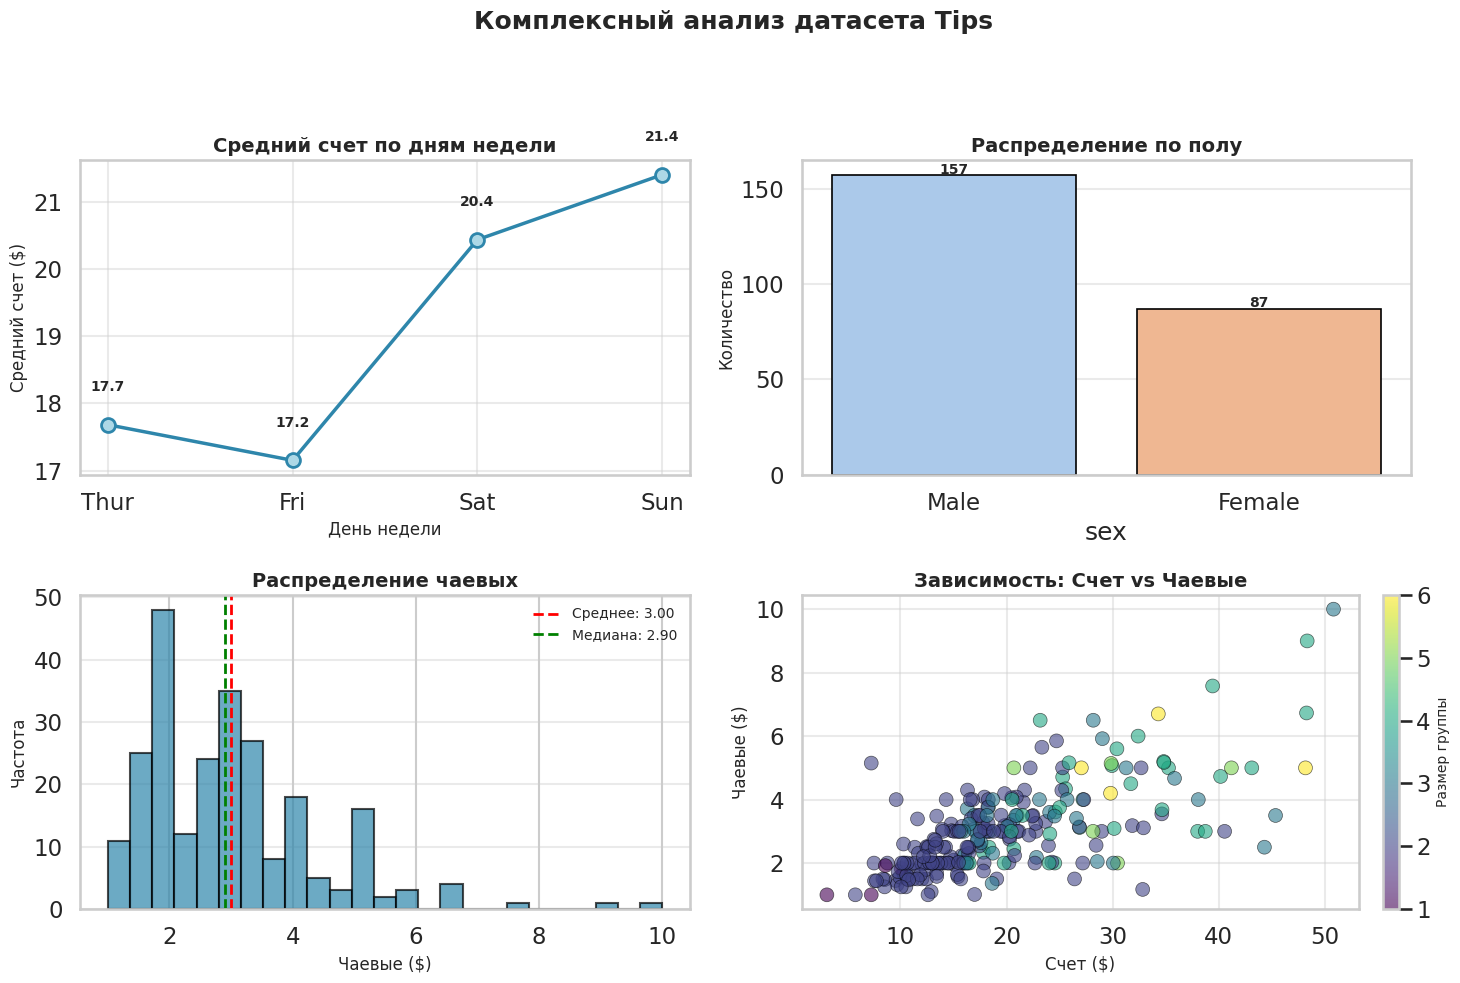

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Комплексный анализ датасета Tips', fontsize=18, fontweight='bold', y=1.02)

# График 1: Линейный - средний счет по дням
daily_avg = data.groupby('day')['total_bill'].mean()
days_order = ['Thur', 'Fri', 'Sat', 'Sun']
daily_avg = daily_avg.reindex(days_order)
axes[0, 0].plot(range(len(daily_avg)), daily_avg.values, marker='o', linewidth=2.5,
                color='#2E86AB', markersize=10, markerfacecolor='lightblue', markeredgewidth=2)
axes[0, 0].set_xticks(range(len(daily_avg)))
axes[0, 0].set_xticklabels(daily_avg.index)
axes[0, 0].set_title('Средний счет по дням недели', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('День недели', fontsize=12)
axes[0, 0].set_ylabel('Средний счет ($)', fontsize=12)
axes[0, 0].grid(True, alpha=0.4)
for i, v in enumerate(daily_avg.values):
    axes[0, 0].text(i, v + 0.5, f'{v:.1f}', ha='center', fontsize=10, fontweight='bold')

# График 2: Столбчатая диаграмма - количество по полу
gender_counts = data['sex'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, ax=axes[0, 1], palette='pastel', edgecolor='black', linewidth=1.2)
axes[0, 1].set_title('Распределение по полу', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Количество', fontsize=12)
axes[0, 1].grid(axis='y', alpha=0.4)
for bar in axes[0, 1].patches:
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 1,
                    f'{int(bar.get_height())}', ha='center', fontsize=10, fontweight='bold')

# График 3: Гистограмма - распределение чаевых
axes[1, 0].hist(data['tip'], bins=25, color='#2E86AB', alpha=0.7, edgecolor='black')
axes[1, 0].axvline(data['tip'].mean(), color='red', linestyle='--', linewidth=2, label=f'Среднее: {data["tip"].mean():.2f}')
axes[1, 0].axvline(data['tip'].median(), color='green', linestyle='--', linewidth=2, label=f'Медиана: {data["tip"].median():.2f}')
axes[1, 0].set_title('Распределение чаевых', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Чаевые ($)', fontsize=12)
axes[1, 0].set_ylabel('Частота', fontsize=12)
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(axis='y', alpha=0.4)

# График 4: Scatter plot - счет vs чаевые
scatter = axes[1, 1].scatter(data['total_bill'], data['tip'], c=data['size'], cmap='viridis',
                              s=100, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[1, 1].set_title('Зависимость: Счет vs Чаевые', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Счет ($)', fontsize=12)
axes[1, 1].set_ylabel('Чаевые ($)', fontsize=12)
axes[1, 1].grid(True, alpha=0.4)
cbar = fig.colorbar(scatter, ax=axes[1, 1], fraction=0.046, pad=0.04)
cbar.set_label('Размер группы', fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

### Часть 3: Seaborn визуализации

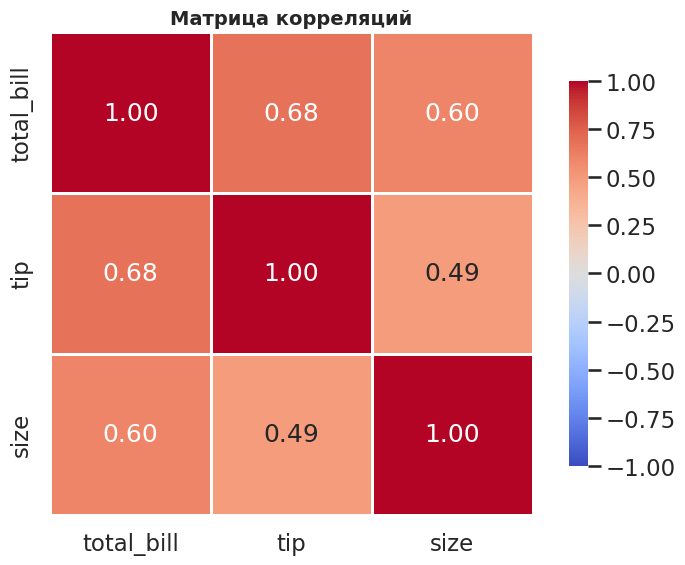

In [54]:
# 1. Heatmap корреляций
plt.figure(figsize=(8, 6))
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            fmt='.2f', vmin=-1, vmax=1)
plt.title('Матрица корреляций', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

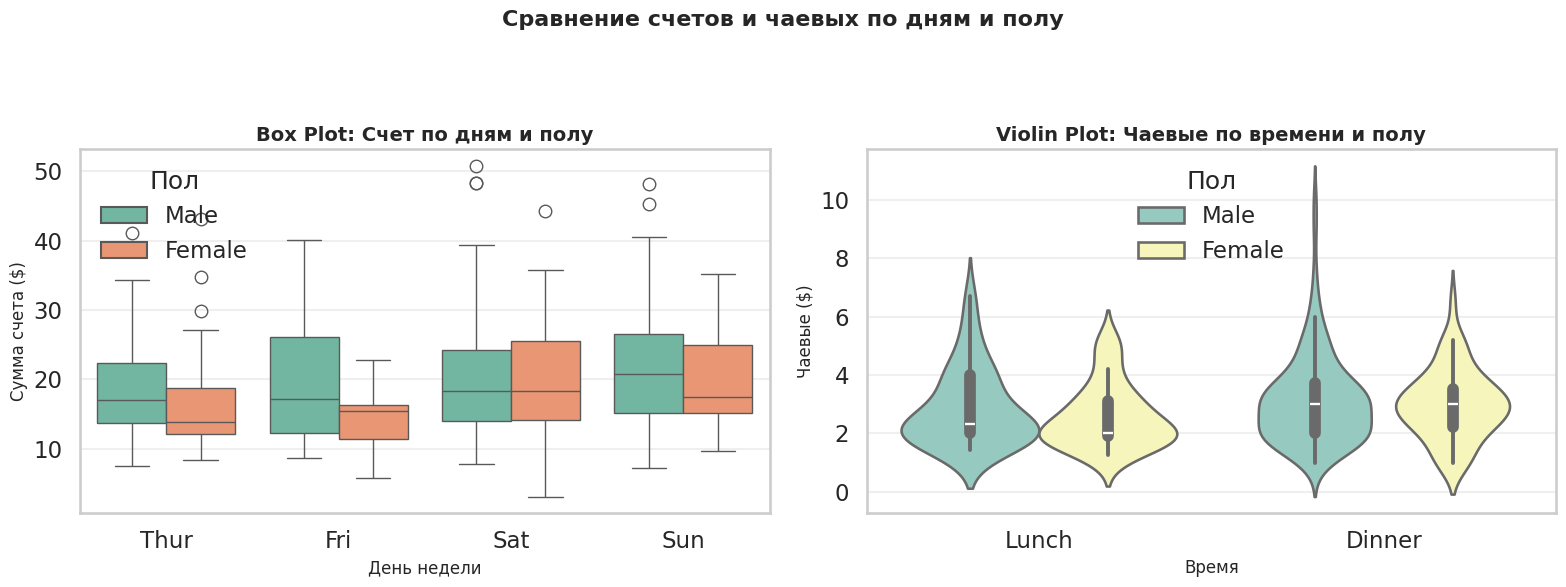

In [56]:
# 2. Box plots для сравнения групп
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Сравнение счетов и чаевых по дням и полу', fontsize=16, fontweight='bold', y=1.02)

# Упорядочиваем пол для последовательности
hue_order = ['Male', 'Female']

sns.boxplot(data=data, x='day', y='total_bill', hue='sex', ax=axes[0], palette='Set2', hue_order=hue_order)
axes[0].set_title('Box Plot: Счет по дням и полу', fontsize=14, fontweight='bold')
axes[0].set_xlabel('День недели', fontsize=12)
axes[0].set_ylabel('Сумма счета ($)', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
axes[0].legend(title='Пол')

sns.violinplot(data=data, x='time', y='tip', hue='sex', ax=axes[1], palette='Set3', hue_order=hue_order)
axes[1].set_title('Violin Plot: Чаевые по времени и полу', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Время', fontsize=12)
axes[1].set_ylabel('Чаевые ($)', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)
axes[1].legend(title='Пол')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])а
plt.show()

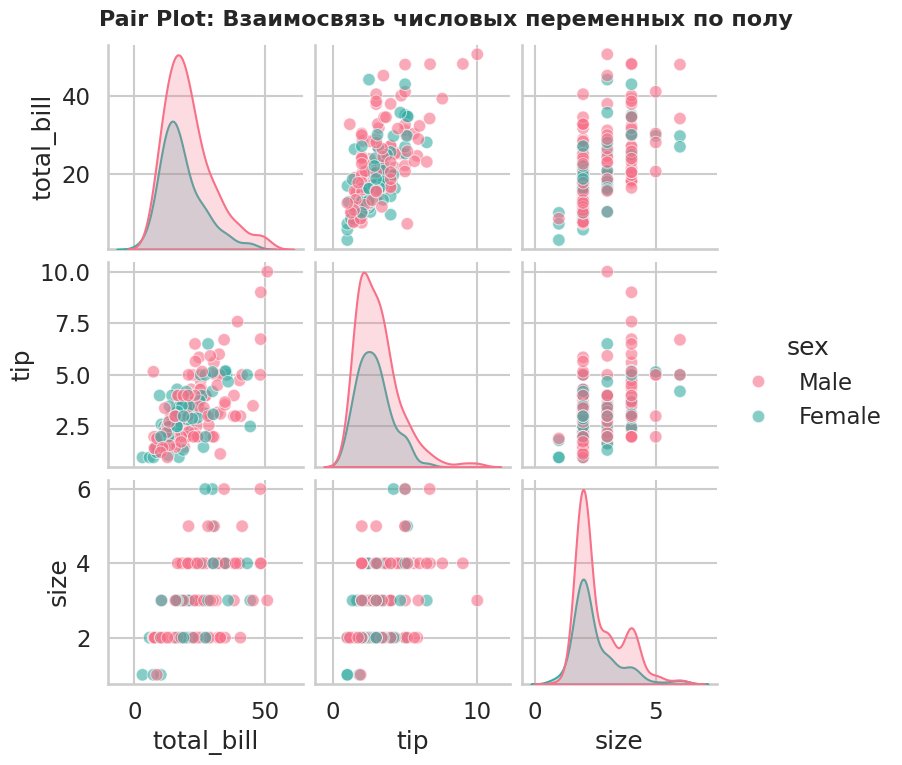

In [60]:
# 3. Pair plot
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
g = sns.pairplot(data[numeric_cols + ['sex']], hue='sex', palette='husl',
                  diag_kind='kde', plot_kws={'alpha': 0.6}, height=2.5) # Увеличен height для лучшей читаемости
g.fig.suptitle('Pair Plot: Взаимосвязь числовых переменных по полу', fontsize=16, fontweight='bold', y=1.02) # Увеличен шрифт заголовка и скорректирован Y-координат
plt.show()

### Часть 4: Plotly интерактивные графики

In [65]:
# Интерактивный Scatter Plot: Счет vs Чаевые, раскрашенный по времени дня
import plotly.express as px

fig_scatter = px.scatter(data, x='total_bill', y='tip', color='time', size='size',
                 hover_data=['day', 'sex'],
                 title='Интерактивный Scatter Plot: Счет vs Чаевые (по времени)',
                 labels={'total_bill': 'Сумма счета ($)', 'tip': 'Чаевые ($)', 'size': 'Размер группы'},
                 template='plotly_white')
fig_scatter.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig_scatter.show()

In [66]:
# Интерактивный Bar Chart: Средний счет по дням недели

avg_bill_by_day = data.groupby('day')['total_bill'].mean().reset_index()
avg_bill_by_day['day'] = pd.Categorical(avg_bill_by_day['day'], categories=days_order, ordered=True)
avg_bill_by_day = avg_bill_by_day.sort_values('day')

fig_bar = px.bar(avg_bill_by_day, x='day', y='total_bill',
             title='Интерактивный Bar Chart: Средний счет по дням недели',
             labels={'day': 'День', 'total_bill': 'Средний счет ($)'},
             color='total_bill', # Раскраска по значению среднего счета
             color_continuous_scale='Plasma', # Измененная цветовая палитра
             template='plotly_white')
fig_bar.update_layout(showlegend=False)
fig_bar.show()

In [67]:
# Интерактивный Box Plot: Распределение чаевых по полу

fig_box = px.box(data, x='sex', y='tip', color='smoker',
            title='Интерактивный Box Plot: Распределение чаевых по полу (курящие/некурящие)',
            labels={'sex': 'Пол', 'tip': 'Чаевые ($)', 'smoker': 'Курящий'},
            template='plotly_white')
fig_box.show()

### Часть 5: Выводы

## 📝 Напишите выводы:

1. **Ключевые находки:** Что вы узнали из визуализаций?
2. **Паттерны:** Какие закономерности вы заметили?
3. **Аномалии:** Есть ли необычные точки данных?
4. **Рекомендации:** Что можно сделать на основе анализа?

### 1. Ключевые находки и общие паттерны:

* Чем больше сумма счета и чем многочисленнее группа клиентов, тем выше сумма оставленных чаевых.
* Суббота и воскресенье демонстрируют самые высокие средние значения по `total_bill` и `tip`, что делает эти дни наиболее прибыльными для заведения.
* Мужчины в среднем тратят больше и оставляют несколько более высокие чаевые по сравнению с женщинами, хотя распределения пересекаются.
* Ужин стабильно показывает существенно более высокие средние счета и чаевые по сравнению с обедои.
* Гистограмма `tip` показывает, что большинство чаевых находится в диапазоне от 2 до 4 долларов, но присутствует значительное количество более крупных чаевых, формирующих "длинный хвост" распределения.

### 2. Специфичные паттерны и аномалии:

* `Box plot` и `Violin plot` показывают, что распределение чаевых в выходные дни (особенно в воскресенье) имеет больший разброс и медиану выше, чем в будни. Распределение чаевых на ужин также шире и выше, чем на обед.
* На графиках `Box plot` и `Scatter plot` заметны отдельные точки данных, которые значительно отличаются от основной массы (выбросы). Эти точки соответствуют очень высоким счетам или крайне щедрым чаевым, что может быть связано с крупными заказами или особыми случаями.
* Интерактивный Box Plot по `smoker` указывает, что хотя медианные чаевые для курящих и некурящих могут быть схожи, у курящих клиентов иногда наблюдается более широкий диапазон чаевых, что может указывать на большее разнообразие в их поведении.
## 3. Рекомендации:

1.  Учитывая максимальную прибыль в выходные дни (суббота и воскресенье) и во время ужинов, следует рассмотреть возможность усиления персонала, предложения специальных акций или развлекательных программ в эти периоды для привлечения еще большего количества клиентов и улучшения качества обслуживания в пиковые часы.

2.  Необходимо постоянно обучать персонал высокому уровню обслуживания, особенно для больших групп и в вечернее время, так как это напрямую влияет на удовлетворенность клиентов и, как следствие, на размер чаевых.

3.  Рассмотреть возможность корректировки меню или ценовых предложений для разных времен суток (обед/ужин) или дней недели, чтобы стимулировать спрос в менее прибыльные периоды, не снижая при этом доходность пиковых часов.

---

## 📚 Полезные ресурсы

- **Matplotlib gallery:** https://matplotlib.org/stable/gallery/
- **Seaborn examples:** https://seaborn.pydata.org/examples/
- **Plotly charts:** https://plotly.com/python/
- **Color brewer:** https://colorbrewer2.org/ (подбор цветовых палитр)
- **Data Viz Best Practices:** https://www.interaction-design.org/literature/article/information-visualization

## 🎓 Критерии оценки

- ✅ Разнообразие типов графиков (5 баллов)
- ✅ Качество оформления и читаемость (3 балла)
- ✅ Интерактивность (2 балла)
- ✅ Осмысленность анализа и выводы (5 баллов)

**Максимум: 15 баллов**